# Numismatic Distribution in Imperial Roman Africa Shown Through Social Network Analysis

## Abstract

Brief summary of the whole study (around 60-120 words), summarising the salient parts of the sections below.

## Context

The context includes: the general field (e.g., literature, history, archaeology, tourism, biology, forensics, religious studies); the specific application (e.g., literary analysis, quantitative history, genetics, virology, forensics intelligence, tourism planning, biblical quantitative studies).

## Problem and Motivation

What are the problems you want to address? Why are those problems important (impact, theoretical and/ or practical needs, etc.)? What are the main contributions of the project?

## Datasets

How did you gather the data? Did you digitise it? How? Is the material publicly available? What tools did you use:
1. to handle (store, manipulate) the data and 
2. to compute measures on the data?

## Validity and Reliability

How closely does the model of your dataset represent reality (validity)?
How consistent is the model you assembled (reliability)?

## Results

What is the connection among: the gathered data, the applied measures, and the properties found?

## Critique

Do you think your work solves the problem presented above? To which extent (completely, what parts)? Why? What could you have done differently to answer your research problems (e.g., gather data with additional information, build your model differently, apply alternative measures)?

## Data Analysis

### Importing

In [1]:
import pandas as pd
from collections import Counter

data_frame = pd.read_csv('isaw-papers-13-data.csv')
data_frame

,Catalogue,Region,Findspot,Province,Type,Denomination,Weight,Year_min,Year_max,Mint_Year,Circulation,Terminal_date,Mint
0,1,Africa,Gafsa,Proconsularis,hoard,sestertius,21.07,104,111,108.0,152.0,259,Rome
1,2,Africa,Gafsa,Proconsularis,hoard,sestertius,21.11,116,117,117.0,143.0,259,Rome
2,3,Africa,Gafsa,Proconsularis,hoard,sestertius,23.27,116,117,117.0,143.0,259,Rome
3,4,Africa,Gafsa,Proconsularis,hoard,sestertius,25.42,119,138,129.0,131.0,259,Rome
4,5,Africa,Gafsa,Proconsularis,hoard,sestertius,21.81,119,138,129.0,131.0,259,Rome
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50965,50966,Africa,Segermes,Proconsularis,sitefind,antoninianus,1.46,270,270,270.0,NaN,NaN,Rome
50966,50967,Africa,Segermes,Proconsularis,sitefind,antoninianus,2.09,270,270,270.0,NaN,NaN,Rome
50967,50968,Africa,Segermes,Proconsularis,sitefind,antoninianus,2.57,270,275,272.5,NaN,NaN,Tripoli
50968,50969,Africa,Segermes,Proconsularis,sitefind,antoninianus,1.46,260,268,264.0,NaN,NaN,Rome


### Exploring and Cleaning: an iterative process

To some extent, I already know what type of data can be found in the dataset and what I want to focus my attention on. For this reason, before analyzing any further, I can exclude some columns and type of data from the dataset, so that I can work on a restricted and on point set.

For example, I will check the Region, the findspot and the denomination to see if there are any empty/NAN/unknown spots and then retain only **Region=Africa**, **findspot=hoard** and **exclude** any denomination of **imitation coins**. Moreover, the timespan the I want to consider is **23 BCE-275 CE**.

In [2]:
Counter(data_frame['Region'])

Counter({'Africa': 35559, 'Gaul': 13587, 'Spain': 1207, 'Britain': 617})

In [3]:
Counter(data_frame['Type'])

Counter({'hoard': 49759, 'sitefind': 1211})

What I can immediately do is retrieve only the data that has as **Region=Africa** and **findspot=hoard**.

In [4]:
df_africa = data_frame[(data_frame['Region'] == 'Africa') & (data_frame['Type'] == 'hoard')]
df_africa

,Catalogue,Region,Findspot,Province,Type,Denomination,Weight,Year_min,Year_max,Mint_Year,Circulation,Terminal_date,Mint
0,1,Africa,Gafsa,Proconsularis,hoard,sestertius,21.07,104,111,108.0,152.0,259,Rome
1,2,Africa,Gafsa,Proconsularis,hoard,sestertius,21.11,116,117,117.0,143.0,259,Rome
2,3,Africa,Gafsa,Proconsularis,hoard,sestertius,23.27,116,117,117.0,143.0,259,Rome
3,4,Africa,Gafsa,Proconsularis,hoard,sestertius,25.42,119,138,129.0,131.0,259,Rome
4,5,Africa,Gafsa,Proconsularis,hoard,sestertius,21.81,119,138,129.0,131.0,259,Rome
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50955,50956,Africa,Banasa - oven,Mauretania Tingitana,hoard,antoninianus,NaN,270,275,272.5,2.5,275,Gaul/Italy
50956,50957,Africa,Banasa - oven,Mauretania Tingitana,hoard,antoninianus,NaN,270,275,272.5,2.5,275,Gaul/Italy
50957,50958,Africa,Banasa - oven,Mauretania Tingitana,hoard,antoninianus,NaN,270,275,272.5,2.5,275,Gaul/Italy
50958,50959,Africa,Banasa - oven,Mauretania Tingitana,hoard,antoninianus,NaN,270,275,272.5,2.5,275,Gaul/Italy


For more clarity, I can delete all the columns that will not be useful for my research.

In [5]:
df_africa = df_africa.drop(['Region','Type', 'Weight', 'Year_min', 'Year_max', 'Circulation', 'Terminal_date'], axis=1)
df_africa

,Catalogue,Findspot,Province,Denomination,Mint_Year,Mint
0,1,Gafsa,Proconsularis,sestertius,108.0,Rome
1,2,Gafsa,Proconsularis,sestertius,117.0,Rome
2,3,Gafsa,Proconsularis,sestertius,117.0,Rome
3,4,Gafsa,Proconsularis,sestertius,129.0,Rome
4,5,Gafsa,Proconsularis,sestertius,129.0,Rome
...,...,...,...,...,...,...
50955,50956,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy
50956,50957,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy
50957,50958,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy
50958,50959,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy


Checking Denominations, I notice that there are “imitation antoninianus” that I need to exclude.

In [6]:
Counter(df_africa['Denomination'])

Counter({'sestertius': 8045,
         'dupondius': 1,
         'denarius': 4603,
         'aureus': 38,
         'as': 4,
         'dupondius/as': 1,
         'antoninianus': 19680,
         'imitation antoninianus': 2012})

In [7]:
df_africa = df_africa[df_africa['Denomination'] != 'imitation antoninianus']
df_africa

,Catalogue,Findspot,Province,Denomination,Mint_Year,Mint
0,1,Gafsa,Proconsularis,sestertius,108.0,Rome
1,2,Gafsa,Proconsularis,sestertius,117.0,Rome
2,3,Gafsa,Proconsularis,sestertius,117.0,Rome
3,4,Gafsa,Proconsularis,sestertius,129.0,Rome
4,5,Gafsa,Proconsularis,sestertius,129.0,Rome
...,...,...,...,...,...,...
50955,50956,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy
50956,50957,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy
50957,50958,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy
50958,50959,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy


For sure, I can also exclude some coins minted before or after the time span of interest.

In [8]:
df_africa = df_africa[(df_africa['Mint_Year'] >= -23) & (df_africa['Mint_Year'] <= 275)]
df_africa

,Catalogue,Findspot,Province,Denomination,Mint_Year,Mint
0,1,Gafsa,Proconsularis,sestertius,108.0,Rome
1,2,Gafsa,Proconsularis,sestertius,117.0,Rome
2,3,Gafsa,Proconsularis,sestertius,117.0,Rome
3,4,Gafsa,Proconsularis,sestertius,129.0,Rome
4,5,Gafsa,Proconsularis,sestertius,129.0,Rome
...,...,...,...,...,...,...
50955,50956,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy
50956,50957,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy
50957,50958,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy
50958,50959,Banasa - oven,Mauretania Tingitana,antoninianus,272.5,Gaul/Italy


In [9]:
df_africa.info() # Index, Datatype and Memory information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32292 entries, 0 to 50959
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Catalogue     32292 non-null  int64  
 1   Findspot      32292 non-null  object 
 2   Province      32292 non-null  object 
 3   Denomination  32292 non-null  object 
 4   Mint_Year     32292 non-null  float64
 5   Mint          32292 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 1.7+ MB


Each column has the correct type, no need for fixes.

In [10]:
df_africa.count() # Returns the number of non-null values in each DataFrame: rows should be 32372

Catalogue       32292
Findspot        32292
Province        32292
Denomination    32292
Mint_Year       32292
Mint            32292
dtype: int64

### Split data

Three historical periods: 
1. 23 BCE- 96 CE
2. 97-192 CE
3. 193-275 CE

In [11]:
df_africa1 = df_africa[df_africa['Mint_Year'] < 97]
df_africa2 = df_africa[(df_africa['Mint_Year'] > 96) & (df_africa['Mint_Year'] < 193)]
df_africa3 = df_africa[df_africa['Mint_Year'] > 192]

In [16]:
def den_per_prov(data_frame, file_name):
    '''
    how many coin of each denomination per province, return csv
    '''
    prov = data_frame['Province'].unique()
    den = data_frame['Denomination'].unique()
    new_d = {'Site': prov.tolist()}
    for d in den.tolist():
        new_d[d] = 0
    new_df = pd.DataFrame(data=new_d)
    for p in prov:
        for idn in data_frame.index:
            if data_frame['Province'][idn] == p:
                denomination = data_frame['Denomination'][idn]
                idx = new_df.index[new_df['Site']== p].values[0]
                new_df.at[idx, denomination] = new_df.at[idx, denomination] +1
    return new_df.to_csv(file_name, index=False)

In [17]:
den_per_prov(df_africa1, 'df_africa1.csv')

In [18]:
den_per_prov(df_africa2, 'df_africa2.csv')

In [21]:
den_per_prov(df_africa3, 'df_africa3.csv')

### Let's see let's see

I run the BR.r script on each of the three tables. This outputs 2 new files  each. Let's see what's inside them.

In [22]:
df1 = pd.read_csv('df_africa1_out.csv')
df1

,Numidia,Proconsularis,Mauretania Tingitana,Mauretania Caesarea,Tripolitania
Numidia,200.000000,171.962617,171.962617,171.962617,171.962617
Proconsularis,171.962617,200.000000,200.000000,180.555556,200.000000
Mauretania Tingitana,171.962617,200.000000,200.000000,180.555556,200.000000
Mauretania Caesarea,171.962617,180.555556,180.555556,200.000000,180.555556
Tripolitania,171.962617,200.000000,200.000000,180.555556,200.000000


In [23]:
df2 = pd.read_csv('df_africa2_out.csv')
df2

,Proconsularis,Numidia,Mauretania Caesarea,Mauretania Tingitana,Tripolitania
Proconsularis,200.000000,35.631124,67.402785,167.204337,9.059409
Numidia,35.631124,200.000000,168.228338,62.813791,173.244180
Mauretania Caesarea,67.402785,168.228338,200.000000,93.571472,141.656624
Mauretania Tingitana,167.204337,62.813791,93.571472,200.000000,36.057971
Tripolitania,9.059409,173.244180,141.656624,36.057971,200.000000


In [24]:
df3 = pd.read_csv('df_africa3_out.csv')
df3

,Proconsularis,Numidia,Mauretania Caesarea,Mauretania Tingitana,Tripolitania
Proconsularis,200.000000,41.488300,171.458863,170.702039,167.909401
Numidia,41.488300,200.000000,37.406979,37.822869,33.857516
Mauretania Caesarea,171.458863,37.406979,200.000000,198.616428,196.223213
Mauretania Tingitana,170.702039,37.822869,198.616428,200.000000,196.034648
Tripolitania,167.909401,33.857516,196.223213,196.034648,200.000000


### Visualizing

<AxesSubplot:xlabel='Mint_Year', ylabel='Province'>

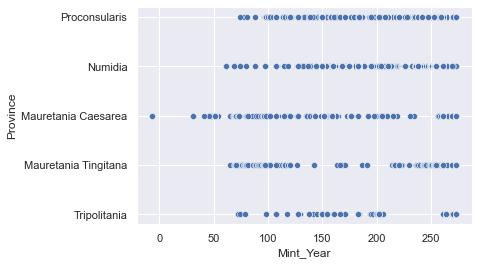

In [89]:
import seaborn as sns
sns.set()

graph = sns.scatterplot(x='Mint_Year', y='Province', data=df_africa)
graph

<AxesSubplot:xlabel='Mint_Year', ylabel='Denomination'>

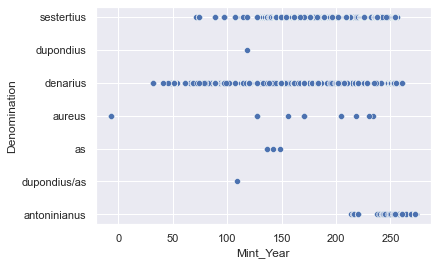

In [90]:
graph = sns.scatterplot(x='Mint_Year', y='Denomination', data=df_africa)
graph